## import

In [1]:
#importing libraries & packages

import pandas as pd
import numpy as np
import seaborn as sns
#sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_profiling
#import datetime
import re
import pprint
pp = pprint.PrettyPrinter(indent=4)
from collections import Counter
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
raw_df = pd.read_csv('Animal_Control_Incidents.csv')

In [3]:
#preserving original df before making alterations
df = raw_df.copy()

## functions

In [5]:
def comp_counts(cols, labels):
    sns.set(rc={'figure.figsize':(10, 5)})
    plt.xlim(-5,100)
    plt.title("times")
    for col, label in zip(cols, labels):
        sns.distplot(df[col].value_counts(), label=label, bins=40)
    plt.legend()
    plt.show();

In [6]:
def plot_counts(cols):
    for i, col in enumerate(cols):
        plt.figure(i)
        sns.countplot(y=col, data=df);

In [7]:
def edit_replace(old_words, replacement_word):
#     try:
#         data = data.apply(lambda x: x.astype(str).str.replace(old_word, replacement_word))
#     except:
#         data = data.str.replace(old_word, replacement_word)
    for word in old_words:
        df['color'] = df.color.apply(lambda x: x.replace(word, replacement_word))

In [8]:
# def edit_replace(old_words, replacement_word):
# #     try:
# #         data = data.apply(lambda x: x.astype(str).str.replace(old_word, replacement_word))
# #     except:
# #         data = data.str.replace(old_word, replacement_word)
#     for word in old_words:
#         df['breed'] = df.breed.apply(lambda x: x.replace(word, replacement_word))

In [9]:
def replace_breed(old_words, replacement_word):
    for word in old_words:
        df['breed'] = df.breed.apply(lambda x: x.replace(word, replacement_word))
        #for word in old_words:
          #  data = data.apply(lambda x: x.replace(word, replacement_word))

In [10]:
# seaborn correlation plot
def corr_plot(data):
    # dummy categorical features
    col_list = list(data.select_dtypes(include=['object']).columns)

    # create dummies for categorical features
    data = pd.DataFrame(pd.get_dummies(data=data,columns=col_list
                       , prefix=col_list))
    sns.set(style="white")
    corr = data.corr()

    #mask the size of covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    f, ax = plt.subplots(figsize=(10, 10))

    sns.heatmap(corr, mask=mask,annot=False, cmap="YlGnBu", vmin = -.3, vmax=.3, center=0,
                square=True, linewidths=.5,cbar_kws= {"shrink": .5} );
    ax.set_ylim(len(data.columns), 0)

## cleaning/EDA

In [11]:
df.head()

,FILE NUMBER,INCIDENT DATE,INCIDENT TIME,DISPATCHED TIME,CALL TAKER,DISPATCHER,DISPATCHED OTHER,DISPATCHED SITUATION,ARRIVAL TIME,AVAILABLE TIME,...,CONDITION,TEMPERMENT,COLLAR,COLLAR COLOR,VACCINATION NUMBER,VACCINATION DATE,PET NAME,DISPOSITION,DISPOSITION DATE,DISPOSITION OFFICER
0,201639027,12/27/2016,15:30,16:06,UNKNOWN,JENNIFER G,0,D,16:17,16:38,...,FAIR,FRIENDLY,NYLON,RED,NaN,NaN,NaN,TRANS CAA,12/27/2016,FRANK S
1,201639044,12/28/2016,10:06,10:07,UNKNOWN,JENNIFER G,0,D,10:15,10:23,...,FAIR,NORMAL,UNKNOWN,UNKNOWN,NaN,NaN,NaN,RETURN TO WILD,12/28/2016,TRAVIS R
2,201639036,12/28/2016,09:03,09:03,UNKNOWN,JENNIFER G,0,D,09:27,09:45,...,EMACIATED,FRIENDLY,LEATHER,PINK,NaN,NaN,NaN,TRANS CAA,12/28/2016,ISAAC S
3,201639042,12/28/2016,09:46,10:24,UNKNOWN,JENNIFER G,0,D,10:35,10:47,...,EMACIATED,FRIENDLY,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TRANS CAA,12/28/2016,JOHN B
4,201639059,12/28/2016,15:05,15:45,UNKNOWN,JENNIFER G,0,D,16:07,16:25,...,EMACIATED,NORMAL,UNKNOWN,UNKNOWN,NaN,NaN,NaN,TRANS CAA,12/28/2016,SUE H


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73303 entries, 0 to 73302
Data columns (total 38 columns):
FILE NUMBER             73303 non-null int64
INCIDENT DATE           73303 non-null object
INCIDENT TIME           72818 non-null object
DISPATCHED TIME         62547 non-null object
CALL TAKER              53134 non-null object
DISPATCHER              60239 non-null object
DISPATCHED OTHER        73303 non-null int64
DISPATCHED SITUATION    62537 non-null object
ARRIVAL TIME            61843 non-null object
AVAILABLE TIME          62545 non-null object
COMPLAINANT STREET      73281 non-null object
REQUEST TYPE            40141 non-null object
OFFICER                 61235 non-null object
EQUIPMENT NUMBER        60251 non-null object
REMARKS                 2098 non-null object
IMPOUND NUMBER          53110 non-null float64
IMPOUND DATE            53105 non-null object
IMPOUND TIME            53046 non-null object
LOCATION                52867 non-null object
MUNICIPALITY       

In [13]:
# removing spaces and lower casing the column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_')

In [14]:
# # not sure why later converting to datetime through a loop only works if done first here
# df.impound_date = pd.to_datetime(df.impound_date)
# df.impound_time = pd.to_datetime(df.impound_date)

In [15]:
pandas_profiling.ProfileReport(df)

Number of variables,38
Number of observations,73303
Total Missing (%),34.8%
Total size in memory,21.3 MiB
Average record size in memory,304.0 B
Numeric,4
Categorical,33
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [16]:
# observations from pandas profile report:

# - lots of columns missing data

# irrelevant columns:
# - ARRIVAL TIME- has most at 00:00
# - AVAILABLE TIME- most at 00:00
# - CALL TAKER
# - COLLAR
# - COLLAR COLOR
# - IMPOUND NUMBER
# - INCIDENT TIME
# - PET NAME
# - REMARKS(too little data provided(3%), existing data doesn't appear to be useful)
# - VACCINATION DATE(99.5% missing)
# - VACCINATION NUMBER
# - ZIP CODE


# columns needing work or consider exclusion:
# - AGE 55% missing
# - X in front of BREED- cross breed?
# - CONDITION 31% missing
# - DISPATCHED OTHER and DISPATCHED SITUATION- what does it mean?
# - EQUIPMENT NUMBER - what does it mean?
# - FILE NUMBER - not unique, is referring to same animal?
# - REQUEST TYPE and SERVICE CODE appear to provide same content
# - SEX contains only 37% M or F, other data missing or irregular
# - SIZE 30% missing
# - SPECIES 28% missing
# - TEMPERMENT 30% missing
# - COLOR 29% missing
# - LOCATION and COMPLAINT STREET can be merged?


In [17]:
df.drop_duplicates(keep=False, inplace=True)

In [18]:
# not really sure why file number has so many duplicates, but for now will drop without exploration
df.drop(columns=['file_number'], inplace=True)

In [19]:
#df['request_type'] = df['request_type'].replace('other',np.nan, inplace=True)
df['service_code'].fillna(df['request_type'],inplace=True)

In [20]:
#for col in ('breed', 'color', 'condition', 'dispatched_situation', 'disposition','size', 'temperment', 'species'):
#    df[col].fillna('unknown', inplace=True)

In [21]:
# data before dropping any columns & rows
org_df = df.copy()

### missing data & exclusion

In [22]:
#percent missing values per column
round(df.isna().sum()/len(df)*100)

incident_date             0.0
incident_time             1.0
dispatched_time          14.0
call_taker               27.0
dispatcher               18.0
dispatched_other          0.0
dispatched_situation     14.0
arrival_time             15.0
available_time           14.0
complainant_street        0.0
request_type             45.0
officer                  17.0
equipment_number         18.0
remarks                  97.0
impound_number           28.0
impound_date             28.0
impound_time             28.0
location                 28.0
municipality             28.0
zip_code                 67.0
service_code              0.0
species                  28.0
breed                    29.0
sex                      45.0
size                     29.0
color                    30.0
age                      55.0
condition                31.0
temperment               30.0
collar                   66.0
collar_color             66.0
vaccination_number       99.0
vaccination_date        100.0
pet_name  

In [23]:
# removing columns with more than 1/3 missing data
df.dropna(axis=1, thresh=(len(df)//1.5), inplace=True)

In [24]:
df.dropna(axis=0,inplace=True)

In [25]:
df.shape

(19773, 26)

### datetime features

#### times

In [27]:
time_cols= [col for col in df.columns if 'time' in col]
time_cols

['incident_time',
 'dispatched_time',
 'arrival_time',
 'available_time',
 'impound_time']

In [28]:
# #convert to datetime ( not neccesary)
# for col in time_cols:
#     df[col] = pd.to_datetime(df[col])

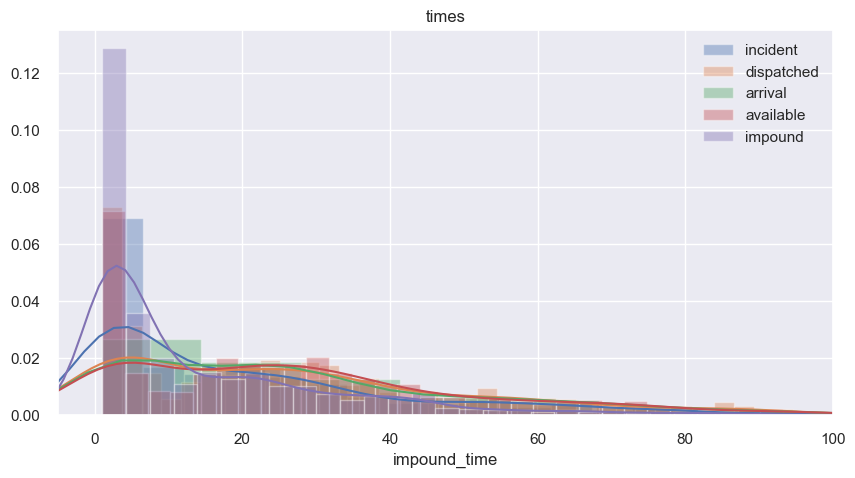

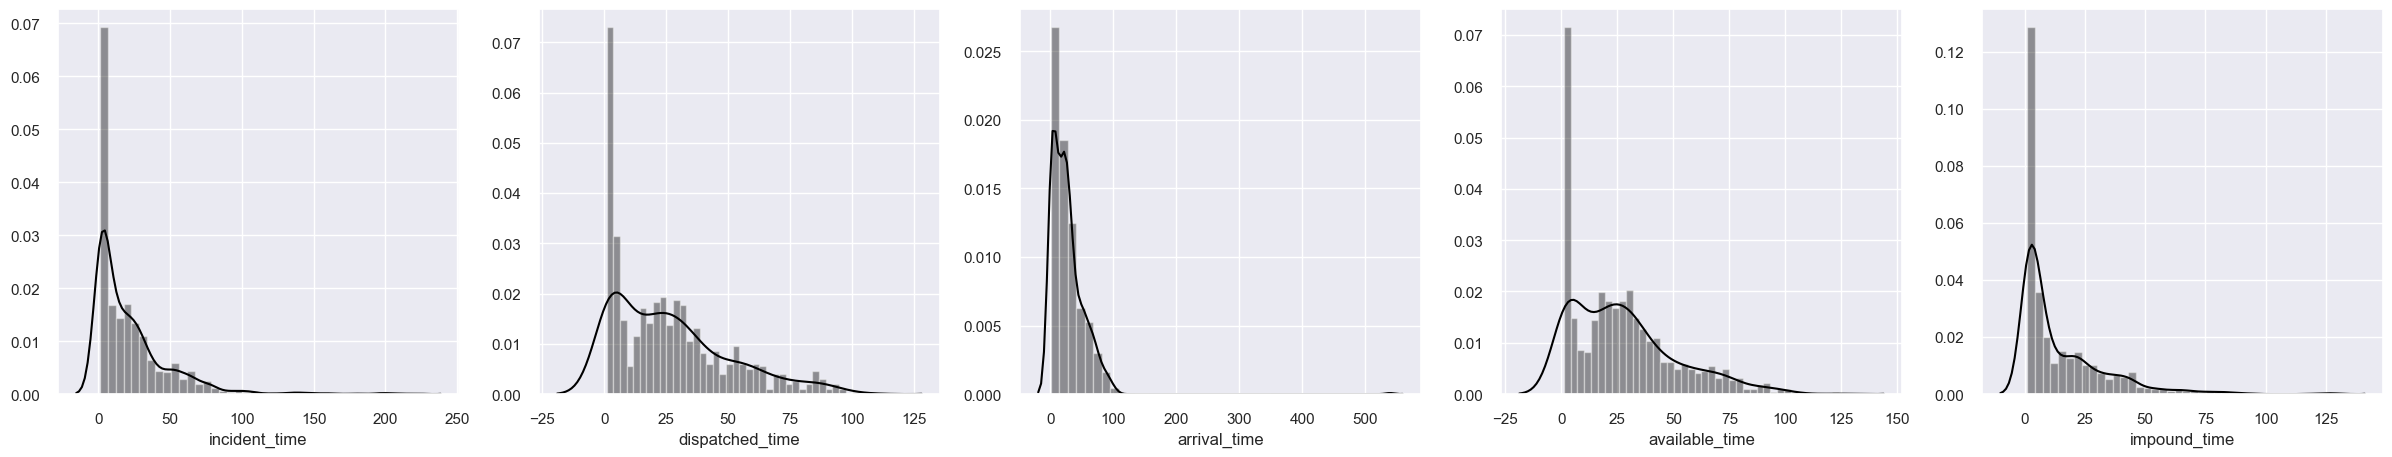

In [29]:
#comparing distribution of time features
comp_counts(time_cols, ('incident', 'dispatched','arrival','available','impound'))

sns.set(font_scale=1)
f, axes = plt.subplots(1, 5,figsize=(30,5))
sns.distplot(df['incident_time'].value_counts(), ax=axes[0], color='black', bins=40)
sns.distplot(df['dispatched_time'].value_counts(), ax=axes[1], color='black',bins=40)
sns.distplot(df['arrival_time'].value_counts(), ax=axes[2], color='black', bins=40)
sns.distplot(df['available_time'].value_counts(), ax=axes[3], color='black', bins=40)
sns.distplot(df['impound_time'].value_counts(), ax=axes[4], color='black', bins=40);

#### dates

In [30]:
date_cols= [col for col in df.columns if 'date' in col]
date_cols

['incident_date', 'impound_date']

In [31]:
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

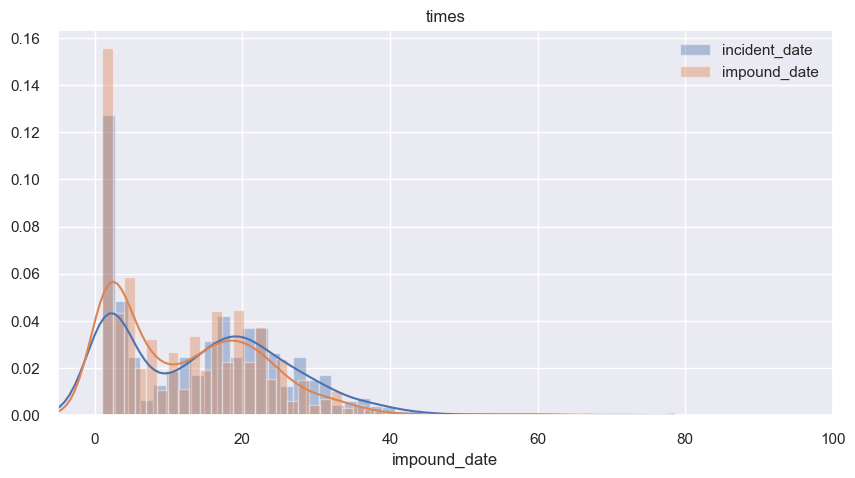

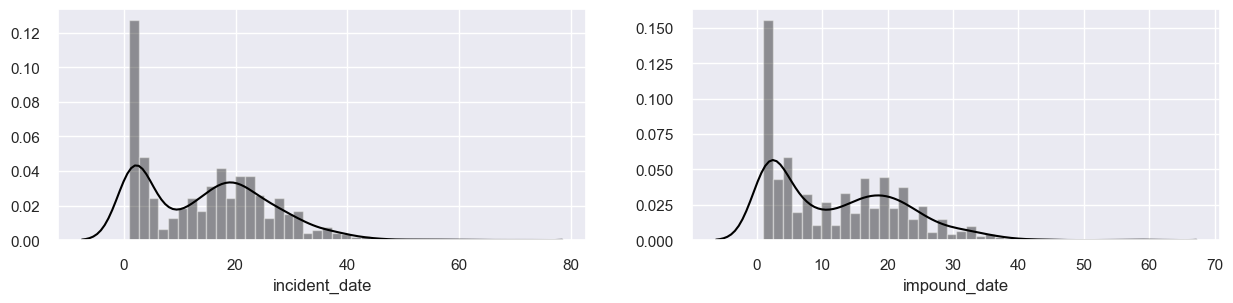

In [32]:
#comparing distribution of date features
comp_counts(date_cols, date_cols)

sns.set(font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,3))
sns.distplot(df['incident_date'].value_counts(), ax=axes[0], color='black', bins=40)
sns.distplot(df['impound_date'].value_counts(), ax=axes[1], color='black', bins=40);
#sns.distplot(df['disposition_date'].value_counts(), ax=axes[2], color='black', bins=40);

### names

In [178]:
df = df.apply(lambda x: x.astype(str).str.lower())
df = df.apply(lambda x: x.astype(str).str.strip())
df = df.apply(lambda x: x.astype(str).str.replace(' ', '_'))

In [34]:
name_cols = ('call_taker', 'dispatcher', 'officer', 'disposition_officer') 

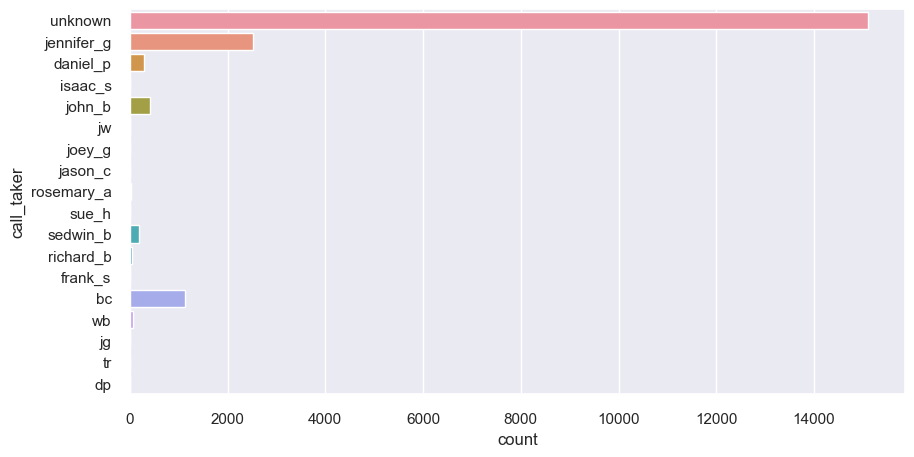

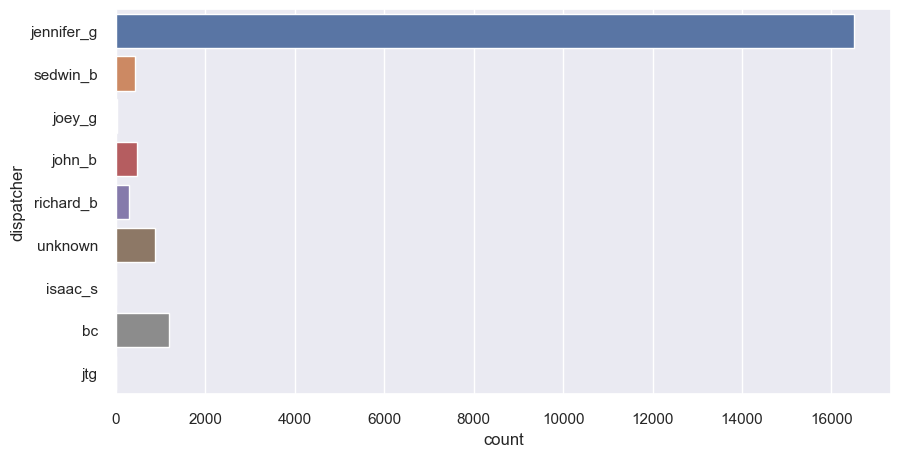

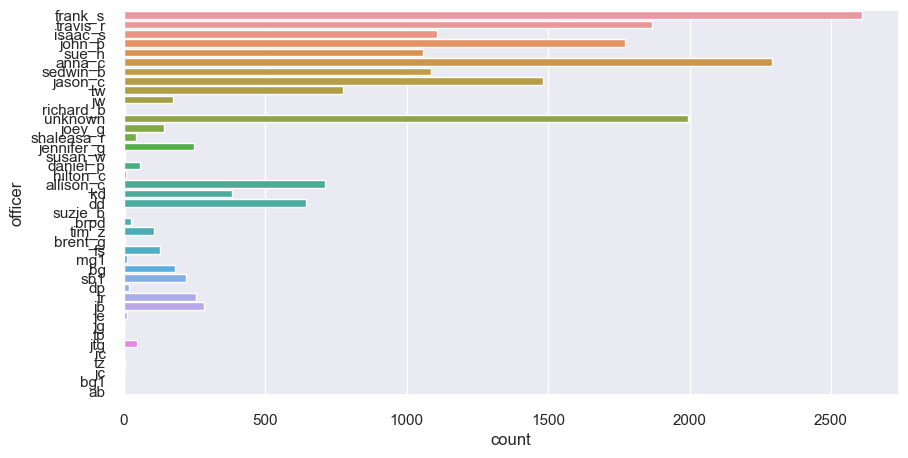

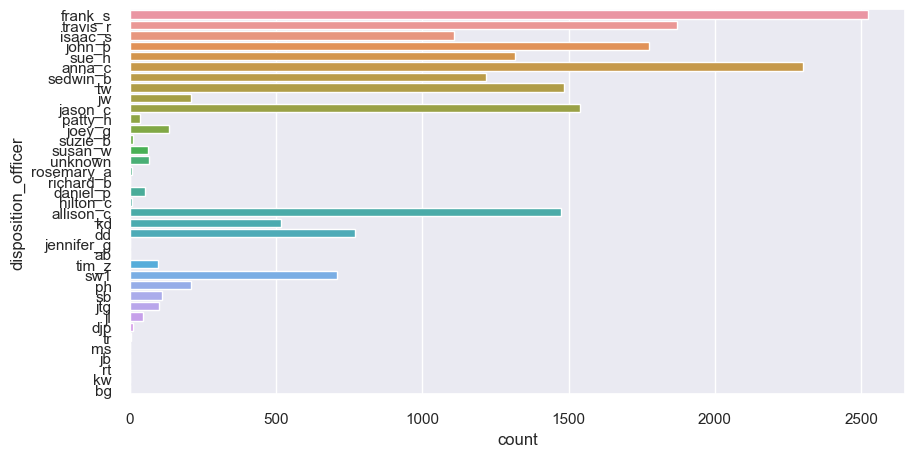

In [35]:
plot_counts(name_cols)

In [36]:
# for col in name_cols:
#     sns.countplot(y=col, data=df)

### location related

In [37]:
loc_cols = ('complainant_street', 'municipality', 'location')

In [38]:
#df = pd.DataFrame(["and this hass a spel error"], columns=["colTest"])
#df.color.apply(lambda x: " ".join([spell(i) for i in x.split()]))

In [39]:
#df.complainant_street.value_counts()

In [40]:
#plot_counts(loc_cols)

### animal features

#### color

In [130]:
df.color.value_counts()

GRY                       1903
BLK/WHT                   1477
BLK                       1310
GRY/WHT                    727
BRWN/WHT                   716
TAN/WHT                    609
BRWN                       597
BROWN                      563
TAN                        534
BLK/TAN                    432
GRY/BLK                    423
GREY                       419
BLK/GRY                    406
BLK/BRWN                   371
BRWN/BLK                   370
BLACK                      336
WHT                        328
GRAY                       317
BLACK/WHITE                310
WHT/BRWN                   268
WHT/BLK                    250
BRINDLE                    220
ORG                        200
BROWN/WHITE                188
WHT/TAN                    186
WHT/GRY                    160
WHITE                      157
BRINDLE/WHT                156
TAN/BLK                    147
TAN/WHITE                  147
                          ... 
CHESTNUT/BLK                 1
BRWNWHT 

Color Feature Cleaning:

- Not liking the all caps, also unnecessary punctuation.


- 1089 unique color values is going to be a problem for machine learning models, so I'd also like to reduce those. Each color needs to have uniform spelling, and combinations with low value counts will be categorized as 'other' to reduce dimensionality and noise.

*_I'll be treating each combination as it's own category. I'm not sure if approaching each color as a separate feature would be practical, but maybe could be given more thought later. I don't see value in each individual color as much as the overall description of color(s) as a whole._

In [ ]:
# looking at strings to evaluate how to edit
results = Counter()
df['color'].str.split(',').apply(results.update)
pp.pprint (results)

In [179]:
characters = ('_','/', '.', ',,', '//','\\')

edit_replace(characters, ',')

In [180]:
#white: wh
whites = ('white', 'cream', 'whute', 'whit', 'whitg', 'wht','whtie', 'wwht', 'what')

edit_replace(whites, 'wht')

In [181]:
# blacks: bl
blacks = ('black', 'blk', 'blkl', 'charcoal', 'bllk', 'balck', 'blavk', 'bkl', 'vlack', 'blavck', 'blkc')

edit_replace(blacks, 'bk')

In [182]:
#browns: br
browns = ('brown', 'brwn', 'brn', 'choc', 'chocolate', 'brwon', 'choclate', 'brw', 'brownish', 'brow', 'brnlate', 'brnish', 'brnolate', 'brnm', 'brolate', 'brblk','chestnut', 'cho', 'brrwn')

edit_replace(browns,'br')

In [183]:
#greys: gry
greys = ('grey', 'gray', 'grrey', 'grey', 'gry')

edit_replace(greys, 'gry')

In [184]:
# tans/beige/blonde: tn
tans = ('beige', 'blonde', 'golden', 'tan\\', 'goldish', 'tna', 'gold', 'tan', 'taan', 'sandy')

edit_replace(tans, 'tn')

In [185]:
# stripes: stripe_tabby
tabbies = ('tabby','tiger', 'tabble', 'taddy', 'tabs', 'tabbie')

edit_replace(tabbies, 'tab')

In [186]:
# striped: strip
# edit_replace('stripe', 'strip')

In [187]:
#orange: or
oranges = ('orange','org', 'orn', 'copper', 'orang', 'orage')

edit_replace(oranges, 'or')

In [188]:
#brindle/fawn: brndl
brindles = ('brindle', 'fawn', 'merle', 'torti', 'marbled', 'tortie', 'bridle', 'brndl', 'brndle', 'brndlee','leopard', 'tortoise', 'brindlw', 'brindlde')

edit_replace(brindles, 'bndle')

In [189]:
#yellow
edit_replace(('yellow','yelow','yellw', 'yell'), 'ylw')

In [155]:
#limiting colors to selected and also only with certain value count(no longer using this method)

#colors = ('wht', 'bk', 'gry', 'br', 'tn', 'spot', 'or', 'tab', 'blue', 'red', 'ylw', 'calico', 'tri', 'green', 'multi', 'dark', 'light', 'pink')

#ndf = df[~df['color'].isin([colors])]

#ndf = ndf[ndf.color.value_counts()>=20]

#ndf.color.value_counts()

In [190]:
# defining counts to separate at 20 value counts
counts = df['color'].value_counts()

In [191]:
# color combinations with less than 20 counts will be categorized as 'other'
other_color_df =df[df['color'].isin(counts[counts < 20].index)]

other_color_df['color'] = 'other'

/Users/Janelle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [202]:
#should be one value: 'other'
other_color_df.color.value_counts()

other    1123
Name: color, dtype: int64

In [193]:
# color values with over/equal to 20 counts
colors_df =df[df['color'].isin(counts[counts >= 20].index)]

In [199]:
#should be 20 or more per value
colors_df.color.value_counts().tail()

or,tab       25
tn,wht,bk    22
tn,gry       22
bk,ylw       21
wht,bk,tn    21
Name: color, dtype: int64

In [195]:
#joining the 'other color' and 'all colors' dfs
ec_df = pd.concat([colors_df,other_color_df ])
len(ec_df)

In [201]:
#all should have a minimum 20 value counts, 'other' should now be included
ec_df.color.value_counts()

gry           2639
bk,wht        1894
bk            1654
br            1271
other         1123
gry,wht       1061
br,wht        1019
tn,wht         823
tn             618
gry,bk         617
bk,gry         594
bk,tn          553
br,bk          512
wht            509
bk,br          480
wht,br         373
wht,bk         312
bndle          288
wht,gry        263
or             250
wht,tn         247
bndle,wht      233
tn,bk          188
gry,tn         186
or,wht         166
ylw            109
bk,tn,wht      108
blue,wht       107
br,gry         105
br,tn          102
red             92
bk,br,wht       89
gry,tab         87
calico          86
br,bk,wht       69
gry,br          67
bk,gry,wht      64
blue            58
tri             55
tab             45
wht,bndle       45
gry,bk,wht      44
tn,bk,wht       44
tn,br           41
br,wht,bk       40
red,wht         38
wht,bk,br       36
br,bndle        32
wht,br,bk       31
bk,or           28
multi           26
br,tab          26
wht,or      

In [203]:
# results = Counter()
# df['color'].str.split(',').apply(results.update)
# pp.pprint (results)

#### breed

In [207]:
df.breed.value_counts().head(40)

pit                             4431
dsh                             4357
possum                          2188
raccoon                         1449
labrador                        1307
terrier                          904
german_shepherd                  524
shepherd                         393
chihuahua                        331
dmh                              249
other                            229
hound                            224
dlh                              194
beagle                           149
horse                            149
snake_domestic_non_poisonous     136
boer                             134
squirrel                         127
shih_tzu                         119
rott                             119
rottweiler                       116
armadillo                        111
dachshund                         86
husky                             81
yorkshire_terrier                 73
retriever                         73
american_bulldog                  70
c

In [204]:
# removing x. This could mean cross breed, but for the sake of dimension reducing, will be removed.
# may find it more beneficial to not remove in future work?

df['breed'] = df.breed.apply(lambda x: x.replace('x', ''))

In [206]:
# editting what's safe to assume are different spellings for same breed, and spaces=_
df = df.apply(lambda x: x.replace('rottweiller', 'rott'))
df = df.apply(lambda x: x.replace('rottweiler', 'rott'))
df = df.apply(lambda x: x.replace('pit_bull', 'pitbull'))
df = df.apply(lambda x: x.replace('pitbull', 'pit'))
df = df.apply(lambda x: x.replace('labrador_retriever', 'labrador'))
df = df.apply(lambda x: x.replace(' ', '_'))

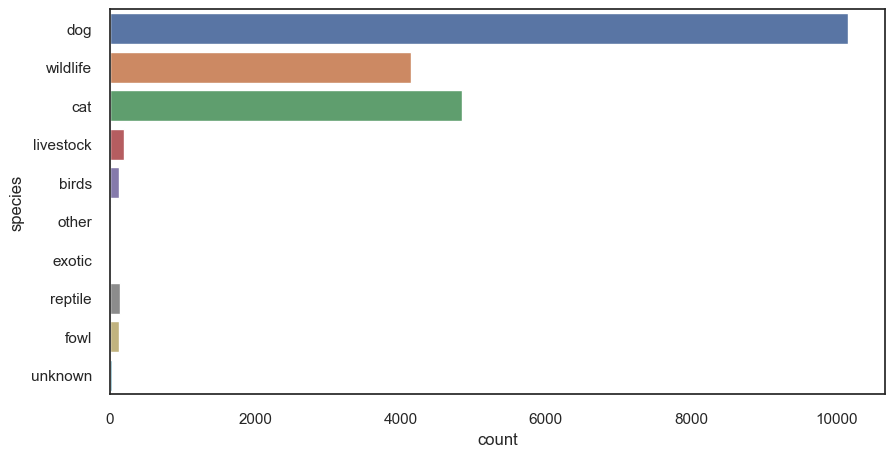

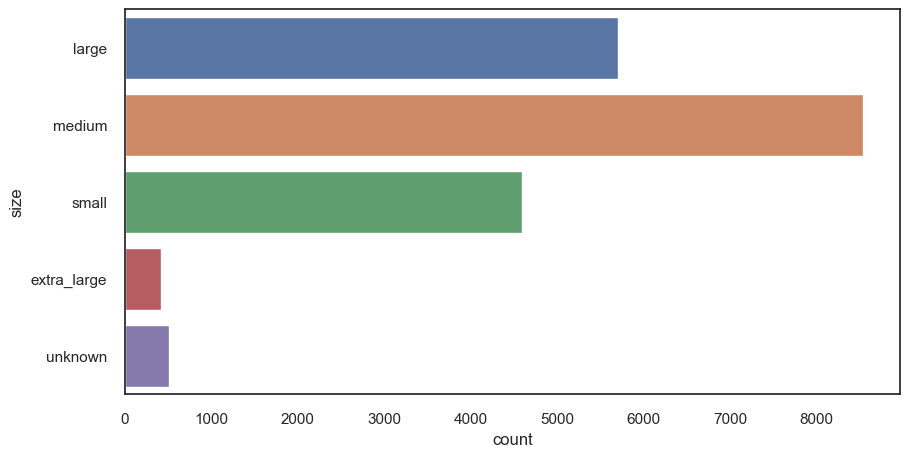

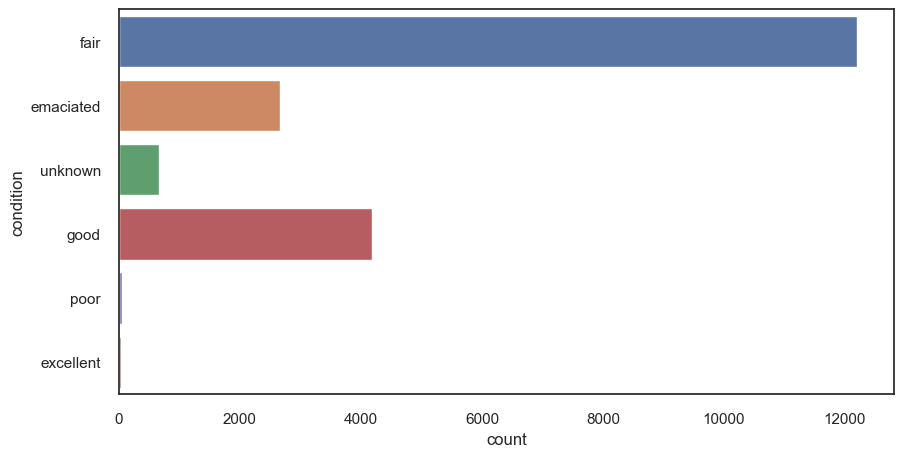

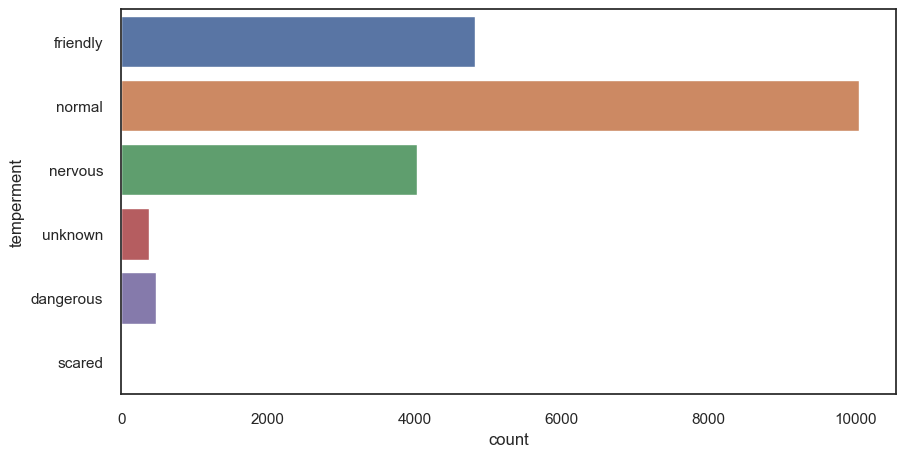

In [208]:
#value counts of species, size, condition, and temperment features
ssct_df = df[['species', 'size', 'condition', 'temperment']]

plot_counts(ssct_df)

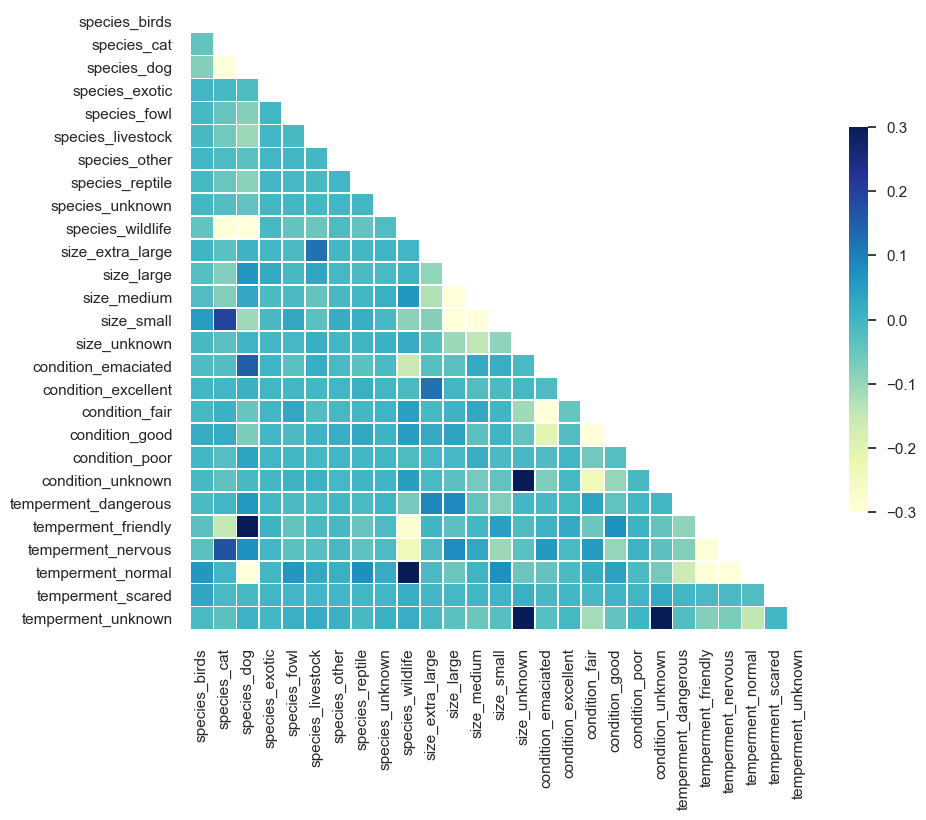

In [64]:
# correlations between species, size, condition, and temperment
corr_plot(ssct_df)

#### condition, temperment, size

In [65]:
df.condition.value_counts()

fair         12200
good          4177
emaciated     2658
unknown        669
poor            43
excellent       26
Name: condition, dtype: int64

In [66]:
df.temperment.value_counts()

normal       10057
friendly      4827
nervous       4024
dangerous      474
unknown        384
scared           7
Name: temperment, dtype: int64

In [67]:
df['size'].value_counts()

medium         8544
large          5705
small          4597
unknown         510
extra_large     417
Name: size, dtype: int64

In [68]:
cts_df = df[['condition', 'temperment', 'size']]

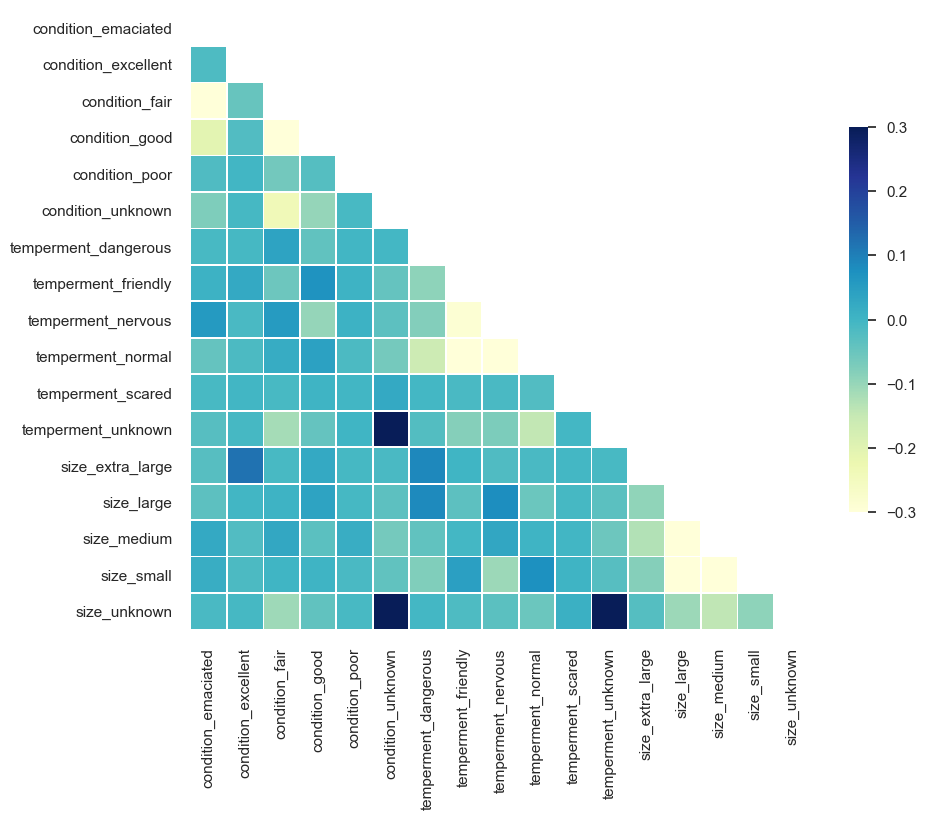

In [69]:
corr_plot(cts_df)

### incident features

In [209]:
#sit_req_df = df[['dispatched_situation', 'request_type']]

In [ ]:
corr_plot(sit_req_df)

In [ ]:
incident_cols= ('dispatched_situation', 'request_type', 'equipment_number', 'impound_number', 'service_code')

In [ ]:
df.dispatched_situation.value_counts()

In [ ]:
# df.request_type.value_counts()

In [ ]:
# df['request_type'] = df['request_type'].replace('other',np.nan)

# df['service_code'].fillna(df['request_type'],inplace=True)

In [ ]:
df.service_code.value_counts()

In [ ]:
df['service_code'] = df['service_code'].apply(lambda x: x.replace('stray_an._secured', 'stray_an_secured'))
df['service_code'] = df['service_code'].apply(lambda x: x.replace('dangerous_animal_sit.', 'dangerous_animal_sit'))

In [ ]:
#df['service_code'] = df['request_type'].replace('other',np.nan)

In [ ]:
# df[].fillna(0, inplace=True)

In [ ]:
# df['service_code'].fillna(df['request_type'],inplace=True)

In [ ]:
#df.groupby(['zip_code'])['municipality_'].value_counts().unstack().plot.bar(figsize=(14,7));